# Import useful Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import Data

In [3]:
df = pd.read_csv('50_Startups.csv')

# Analyze the data

In [4]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


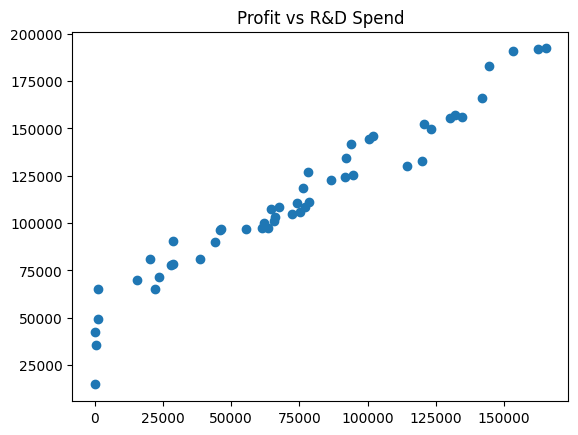

In [5]:
plt.scatter(df['R&D Spend'], df['Profit'])
plt.title('Profit vs R&D Spend')
plt.show()

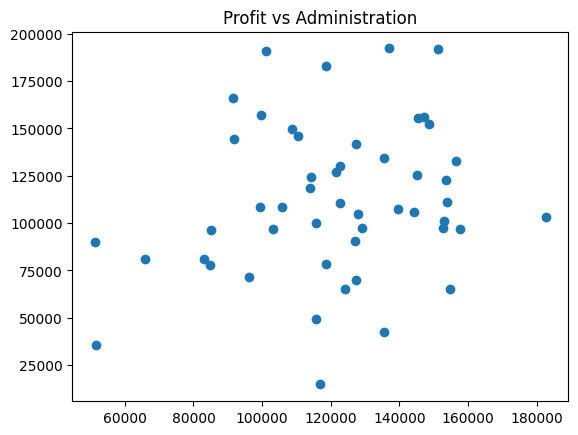

In [6]:
plt.scatter(df['Administration'], df['Profit'])
plt.title('Profit vs Administration')
plt.show()

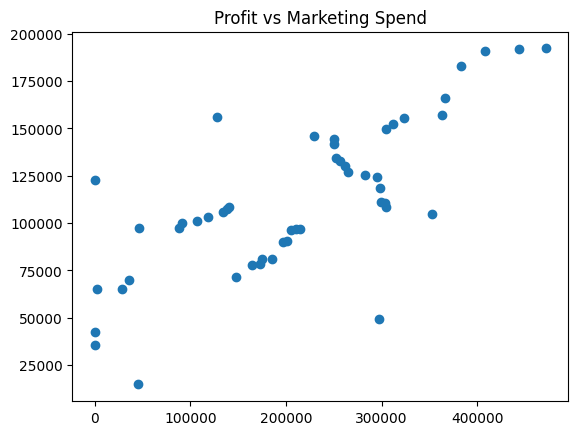

In [7]:
plt.scatter(df['Marketing Spend'], df['Profit'])
plt.title('Profit vs Marketing Spend')
plt.show()

In [8]:
df['State'].value_counts()

State
New York      17
California    17
Florida       16
Name: count, dtype: int64

# Clean the Data

In [10]:
df.isnull().sum().sum()

np.int64(0)

In [12]:
df.duplicated().sum()

np.int64(0)

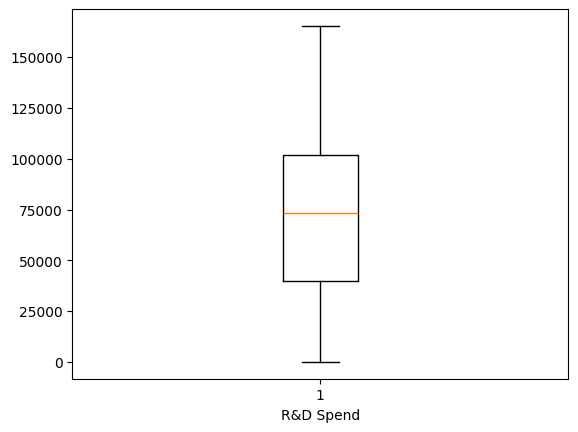

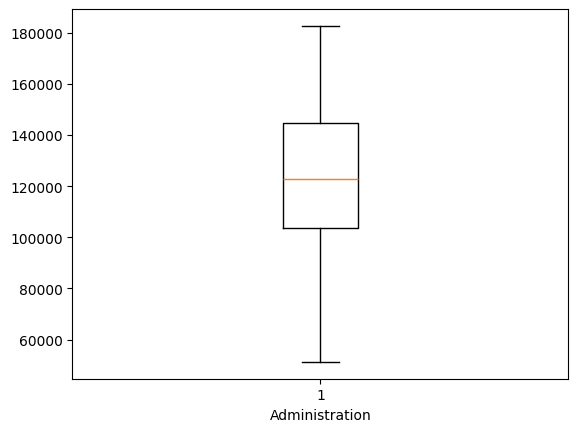

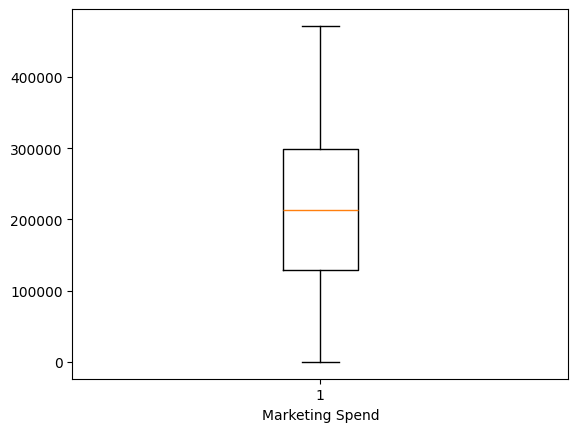

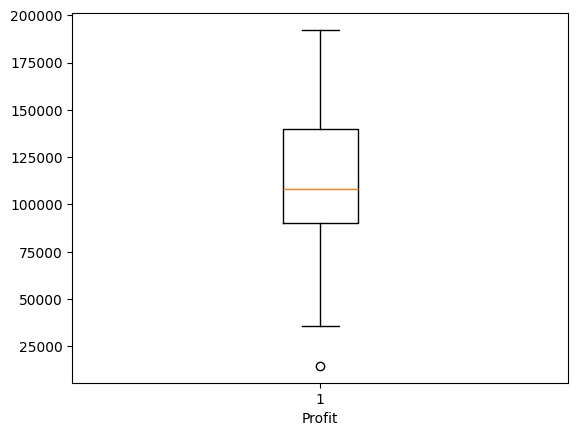

In [13]:
# Check the Outliers ->
col_list = list(df.columns)
for x in col_list:
    if df[x].dtype=='float64':
        plt.boxplot(df[x])
        plt.xlabel(x)
        plt.show()

# Encoding the State column

In [14]:
df['NY'] = np.where(df['State'] == 'New York', 1, 0)
df['CL'] = np.where(df['State'] == 'California', 1, 0)

In [15]:
df.drop(columns = ['State'], axis = 1, inplace = True)

In [16]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,NY,CL
0,165349.20,136897.80,471784.10,192261.83,1,0
1,162597.70,151377.59,443898.53,191792.06,0,1
2,153441.51,101145.55,407934.54,191050.39,0,0
3,144372.41,118671.85,383199.62,182901.99,1,0
4,142107.34,91391.77,366168.42,166187.94,0,0


# PreProcess the Data

In [17]:
Target = 'Profit' # output data / dependent varible 

In [18]:
df1 = df.drop(columns = [Target], axis = 1) # remove target col in new table
independent_var = df1.columns

In [20]:
X = df[independent_var].values # independent var
y = df[Target].values # dependent var

# Train-Test Split the data

In [21]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 42) 
#every time same data point to use random_state

# Min-Max Scaler data preprocessing

In [22]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
Xtrain = scale.fit_transform(Xtrain)
Xtest = scale.fit_transform(Xtest)

# Train Our Model

In [23]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() # our model name
regressor.fit(Xtrain, ytrain)

LinearRegression()

# Analyze the Model

In [24]:
regressor.intercept_    # beta zero val is 51439

# if You are not spend so profit is 51439

np.float64(51439.17400291732)

In [26]:
regressor.coef_  # beta val for each

array([133210.28653155,  -9036.14268303,  14085.32326907,   -931.80524618,
         -938.79300615])

# Test Our Model

In [27]:
y_pred_train = regressor.predict(Xtrain)

In [28]:
y_pred_test = regressor.predict(Xtest)

# To Check Error

In [29]:
from sklearn.metrics import r2_score, mean_squared_error

In [30]:
r2_score(y_pred_train, ytrain)

0.9514544370272751

In [31]:
r2_score(y_pred_test, ytest)

0.27977536505296996

# Visulize the Our Model

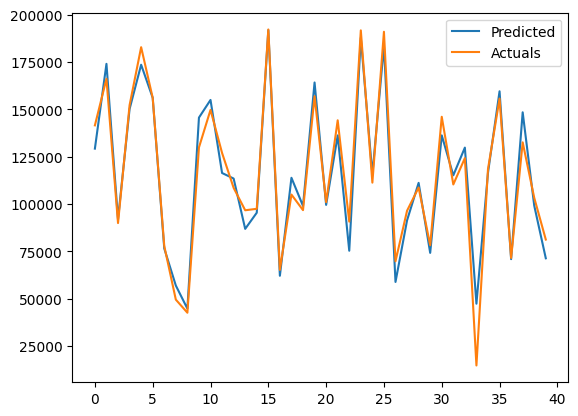

In [32]:
plt.plot(y_pred_train)
plt.plot(ytrain)
plt.legend(['Predicted', 'Actuals'])
plt.show()

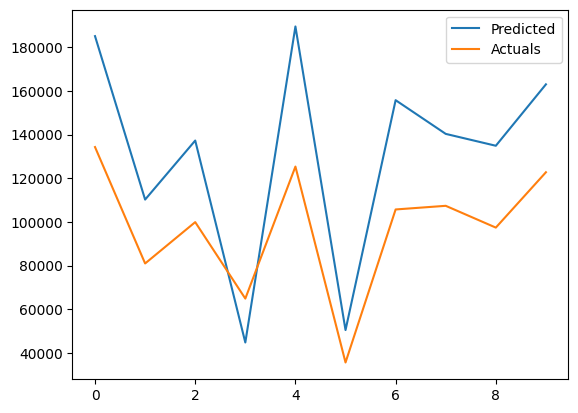

In [33]:
plt.plot(y_pred_test)
plt.plot(ytest)
plt.legend(['Predicted', 'Actuals'])
plt.show()

>

>

# Regularization of Linear Regration by Lasso tech

In [34]:
from sklearn.linear_model import Lasso

In [35]:
lasso = Lasso(alpha=0.1, max_iter=3000) # alpha == step size

lasso.fit(Xtrain, ytrain)

Lasso(alpha=0.1, max_iter=3000)

In [36]:
L_y_pred_train = lasso.predict(Xtrain)

In [37]:
L_y_pred_test = lasso.predict(Xtest)

In [38]:
r2_score(L_y_pred_train, ytrain)

0.9514547413688007

In [39]:
r2_score(L_y_pred_test, ytest)

0.279745837038199

>

>

# GridSearchCV

In [40]:
from sklearn.model_selection import GridSearchCV

In [58]:
lasso2 = Lasso()
parameters = {'alpha': [1e-15, 1e-13, 1e-11, 1e-9, 1e-7, 1e-5 ,1e-3, 1e-1, 1, 3, 5, 7, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 500 ],
              'max_iter': [2000,3000,4000,5000,6000]}
lasso_regressor = GridSearchCV(lasso2, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(Xtrain, ytrain)

c:\Users\Bhautik Gondaliaya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.096e+09, tolerance: 4.431e+06
  model = cd_fast.enet_coordinate_descent(
c:\Users\Bhautik Gondaliaya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.193e+09, tolerance: 4.222e+06
  model = cd_fast.enet_coordinate_descent(
c:\Users\Bhautik Gondaliaya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase 

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-11, 1e-09, 1e-07, 1e-05,
                                   0.001, 0.1, 1, 3, 5, 7, 9, 10, 20, 30, 40,
                                   50, 60, 70, 80, 90, 100, 200, 300, 500],
                         'max_iter': [2000, 3000, 4000, 5000, 6000]},
             scoring='neg_mean_squared_error')

In [59]:
L2_y_pred_train = lasso_regressor.predict(Xtrain)
L2_y_pred_test = lasso_regressor.predict(Xtest)

In [60]:
r2_score(L2_y_pred_train, ytrain)

0.9416476510347367

In [61]:
r2_score(L2_y_pred_test, ytest)

0.24733109373783335

In [63]:
lasso_regressor.best_params_

{'alpha': 500, 'max_iter': 2000}